In [1]:
import numpy as np
from numpy import linalg as LA


import scipy
from scipy import linalg
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
'''Ejercicio 2'''
# el siguiente codigo genera la data usada en este problema

train_n = 100
test_n = 1000
d = 100  # notar que el numero de dimensiones es igual al de puntos de entrenamiento
X_train = np.random.normal(0,1, size=(train_n,d))   # (100, 100)
a_true = np.random.normal(0,1, size=(d,1))          # (100, 1)
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))    # (1000, 1)

In [3]:
print("X_train.shape = ", X_train.shape)
print("a_true.shape = ", a_true.shape)
print("y_train.shape = ", y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ", y_test.shape)

X_train.shape =  (100, 100)
a_true.shape =  (100, 1)
y_train.shape =  (100, 1)
X_test.shape =  (1000, 100)
y_test.shape =  (1000, 1)


In [4]:
'''Ejercicio 2.a'''
X_train_inv = LA.inv(X_train)  # (100, 100)
a_learned_exact = X_train_inv.dot(y_train)  # (100, 1)
# solucion exacta de minimizacion de la funcion objetivo f(a)
# notar que la formula sesimplifica porque X_train es cuadrada
print("a_learned_exact.shape = ", a_learned_exact.shape)

a_learned_exact.shape =  (100, 1)


In [5]:
# borrador de exploracion antes de la solucion
y_predict_train = X_train.dot(a_learned_exact) # (100, 1)
err_train = y_predict_train - y_train          # (100, 1)
print("y_predict_train.shape = ", y_predict_train.shape)
print("err_train.shape = ", err_train.shape)

y_predict_test = X_test.dot(a_learned_exact)   # (1000, 1)
err_test = y_predict_test - y_test             # (1000, 1)
print("y_predict_test.shape = ", y_predict_test.shape)
print("err_test.shape = ", err_test.shape)

print("Magnitud del error en el training set = ", (err_train.T).dot(err_train)[0,0])
print("Magnitud del error en el test set     = ", (err_test.T).dot(err_test)[0,0])
print("en error en el train set es cero pero en el test set es muy grande,")
print("por que?")
print("para los estudios que siguen nos va a convenir 'normalizar' el error")
print("para tener numeros mas manejables.")

y_predict_train.shape =  (100, 1)
err_train.shape =  (100, 1)
y_predict_test.shape =  (1000, 1)
err_test.shape =  (1000, 1)
Magnitud del error en el training set =  3.203872140256292e-24
Magnitud del error en el test set     =  730873.3368441842
en error en el train set es cero pero en el test set es muy grande,
por que?
para los esudios que siguen nos va a convenir 'normalizar' el error
para tener numeros mas manejables.


In [6]:
def f_hat(X, a, y):   # calcula el error normalizado
    y_pred = X.dot(a)
    err = y_pred - y
    err2 = (err.T).dot(err)
    norm2 = (y.T).dot(y)
    err_norm = np.sqrt(err2/norm2)
    return err_norm[0,0]

print("normalized train error = ", f_hat(X_train, a_learned_exact, y_train))
print("normalized test error  = ", f_hat(X_test, a_learned_exact, y_test))
print("el error 'normalizado'.")

normalized train error =  1.4775448187439637e-14
normalized test error  =  2.6200913353227198
el error 'normalizado'.


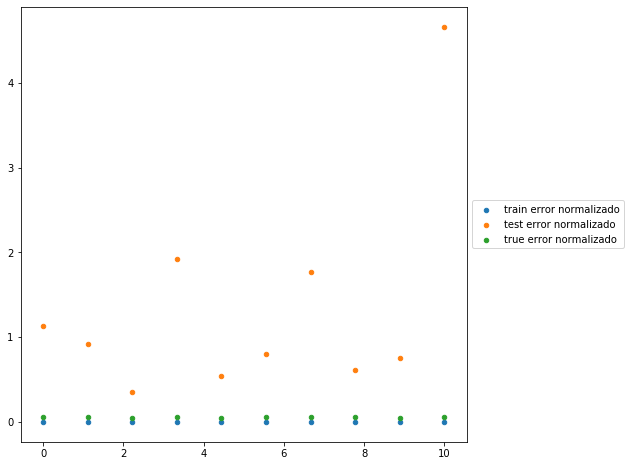

de ahora en mas todos los errores son normalizados.
average train error over 10 trials  =  3.72997200672408e-14
el 'training error' es cero cuando train_n = d
average test error over 10 trials   =  1.3443512749470883
ratio test error / training error   =  36041859631214.516
average true error over 10 trials   =  0.051682871437586764
ratio test error / true error       =  26.01154381622455
comparar este ^ ratio con el obtenido en el ejercicio 1, donde 
como train_n >> d, generaliza bien y este ratio era ~ 1
ratio train error / true error      =  7.217037101408862e-13
notar que en situaciones normales no conocemos el 'true error'
sigue siendo cierto que 'train error' < 'true error' < 'test error'
pero ahora 'train error' << 'true error' << 'test error', ¿Por que?


In [8]:
# Como train_n = d, la maquina sobrefittea
# el training error es cero
# el test error es muy grande
# el "true error" es aproximadamente lo que seria el test error si tuvieramos train_n >> d
# (ver ejercicio 1)
#
# El test error nunca puede ser cero porque y tiene ruido
#
# y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
#
# es decir, la mejor prediccion que se puede hacer de a es a_true
# que tiene el error np.random.normal(0,0.5)

trials = 10

train_n = 100
test_n = 1000
d = 100

error_train = np.zeros(trials)
error_test  = np.zeros(trials)
error_true  = np.zeros(trials)

for i in range(trials):
    X_train = np.random.normal(0,1, size=(train_n,d))                        # (100, 100)
    a_true = np.random.normal(0,1, size=(d,1))                               # (100, 1)
    y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
    X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
    y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))    # (1000, 1)
    
    X_train_inv = LA.inv(X_train)               # (100, 100)
    a_learned_exact = X_train_inv.dot(y_train)  # (100, 1)
    # este vector esta "aprendiendo" la señal y el ruido

    error_train[i] = f_hat(X_train, a_learned_exact, y_train)
    error_test[i] = f_hat(X_test, a_learned_exact, y_test)
    error_true[i] = f_hat(X_test, a_true, y_test)

average_error_train = np.mean(error_train)
average_error_test = np.mean(error_test)
average_error_true = np.mean(error_true)

fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(0, trials, trials)

ax.scatter(x, error_train, label = "train error normalizado", s = 20)
ax.scatter(x, error_test, label = "test error normalizado", s = 20)
ax.scatter(x, error_true, label = "true error normalizado", s = 20)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

print("de ahora en mas todos los errores son normalizados.")
print("average train error over 10 trials  = ", average_error_train)
print("el 'training error' es cero cuando train_n = d")
print("average test error over 10 trials   = ", average_error_test)
print("ratio test error / training error   = ", average_error_test/average_error_train)
print("average true error over 10 trials   = ", average_error_true)
print("ratio test error / true error       = ", average_error_test/average_error_true)
print("comparar este ^ ratio con el obtenido en el ejercicio 1, donde \ncomo train_n >> d, generaliza bien y este ratio era ~ 1")
print("ratio train error / true error      = ", average_error_train/average_error_true)
print("notar que en situaciones normales no conocemos el 'true error'")
print("sigue siendo cierto que 'train error' < 'true error' < 'test error'")
print("pero ahora 'train error' << 'true error' << 'test error', ¿Por que?")

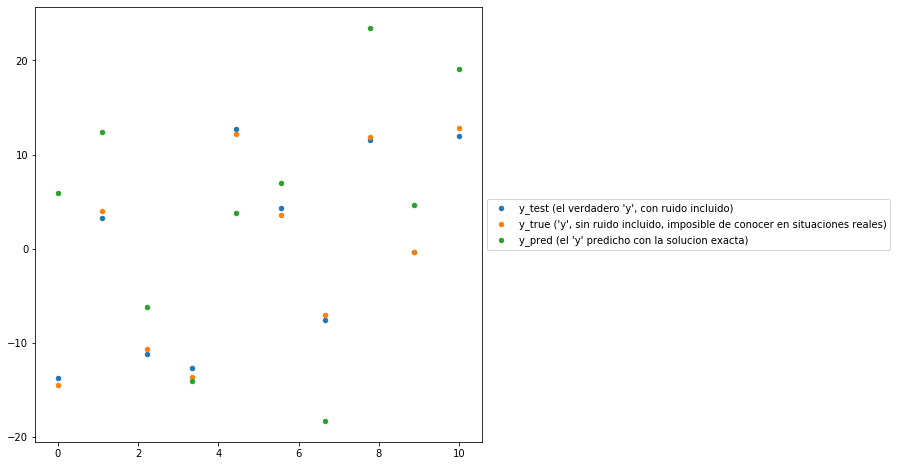

como esta sobrefiteando, no generaliza bien


In [9]:
# veamos como las predicciones de los y_test comparan con los verdaderos y_test,
# y con los que idealmente aprenderiamos
train_n = 100
test_n = 10
d = 100

X_train = np.random.normal(0,1, size=(train_n,d))   # (100, 100)
a_true = np.random.normal(0,1, size=(d,1))          # (100, 1)
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))    # (1000, 1)
    
X_train_inv = LA.inv(X_train)  # (100, 100)
a_learned_exact = X_train_inv.dot(y_train)  # (100, 1)

y_pred = X_test.dot(a_learned_exact)
y_true = X_test.dot(a_true)


fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(0, test_n, test_n)

ax.scatter(x, y_test, label = "y_test (el verdadero 'y', con ruido incluido)", s = 20)
ax.scatter(x, y_true, label = "y_true ('y', sin ruido incluido, imposible de conocer en situaciones reales)", s = 20)
ax.scatter(x, y_pred, label = "y_pred (el 'y' predicho con la solucion exacta)", s = 20)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
print("como esta sobrefiteando, no generaliza bien")

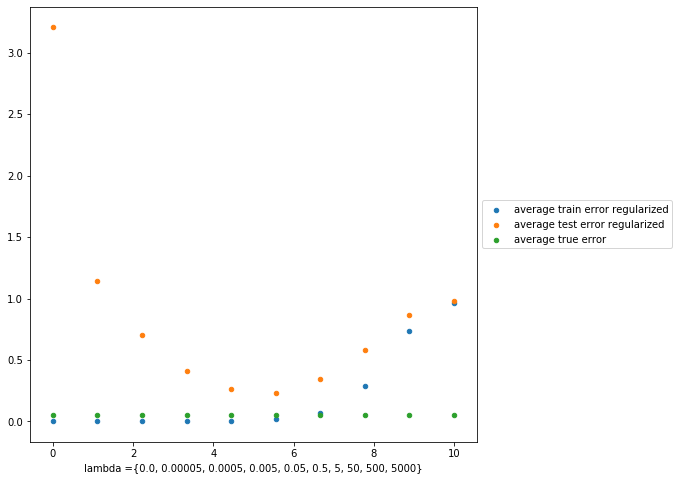

lambda =  [0.e+00 5.e-05 5.e-04 5.e-03 5.e-02 5.e-01 5.e+00 5.e+01 5.e+02 5.e+03]


train error normalizado =  [2.01676365e-09 4.87053104e-04 1.21738188e-03 2.73786906e-03
 5.73038751e-03 1.61322601e-02 6.92622451e-02 2.91202144e-01
 7.38676183e-01 9.62263981e-01]
el training error crece con lambda


test error normalizado  =  [3.20672674 1.14043245 0.70547613 0.41390896 0.26215152 0.23357257
 0.34358483 0.57977245 0.86367697 0.98096909]
pero el test error tiene un minimo en un lambda distinto de cero


true error              =  [0.05042963 0.05042963 0.05042963 0.05042963 0.05042963 0.05042963
 0.05042963 0.05042963 0.05042963 0.05042963]
notar que el train error es menor que el true error para valores chicos de lambda,
pero cuando lambda crece, el train error se vuelve mayor que el true error ¿por que?


¿por que el test error es menor para algunos valores de lambda diferentes de cero?


In [12]:
'''Ejercicio 2.b'''

trials = 1000

train_n = 100
test_n = 1000
d = 100


lambd = [0.0, 0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50, 500, 5000]
l_n = len(lambd)

error_train_reg = np.zeros((l_n, trials))
error_test_reg  = np.zeros((l_n, trials))
error_true_reg  = np.zeros((l_n, trials))

for i in range(trials):             # quiero que cada trial tenga los mismo datos para distintos lambda
    X_train = np.random.normal(0,1, size=(train_n,d))   # (100, 100)
    a_true = np.random.normal(0,1, size=(d,1))          # (100, 1)
    y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
    X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
    y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))    # (1000, 1)

    X = X_train # (100, 100)
    XT = X.T    # (100, 100)
    XTX = XT.dot(X)
    
    for j in range(l_n):
        XTXl = XTX + lambd[j]*np.identity(d)  # (100, 100)
        XTXl_inv = LA.inv(XTXl)               # (100, 100)
        X_reg = (XTXl_inv).dot(XT)            # (100, 100)
        a_learned_reg = (X_reg).dot(y_train)  # (100, 1)
        
        error_train_reg[j,i] = f_hat(X_train, a_learned_reg, y_train)
        error_test_reg[j,i]  = f_hat(X_test, a_learned_reg, y_test)
        error_true_reg[j,i]  = f_hat(X_train, a_true, y_train)

error_train_reg_lambda = np.mean(error_train_reg, axis = 1)
error_test_reg_lambda  = np.mean(error_test_reg, axis = 1)
error_true_reg_lambda  = np.mean(error_true_reg, axis = 1)



fig, ax = plt.subplots(figsize=(8,8))


# x = np.log10(np.array(lambd)/5)
x = np.linspace(0, l_n, l_n)

ax.scatter(x, error_train_reg_lambda, label = "average train error regularized", s = 20)
ax.scatter(x, error_test_reg_lambda, label  = "average test error regularized",  s = 20)
ax.scatter(x, error_true_reg_lambda, label  = "average true error",  s = 20)

# plt.plot(x, error_true_reg_lambda, label  = "average true error regularized")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("lambda ={0.0, 0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50, 500, 5000}")

plt.show()

lambd = np.array(lambd)
print("lambda = ", lambd)
print("\n")
print("train error normalizado = ", error_train_reg_lambda)
print("el training error crece con lambda")
print("\n")
print("test error normalizado  = ", error_test_reg_lambda)
print("pero el test error tiene un minimo en un lambda distinto de cero")
print("\n")
print("true error              = ", error_true_reg_lambda)
print("notar que el train error es menor que el true error para valores chicos de lambda,")
print("pero cuando lambda crece, el train error se vuelve mayor que el true error ¿por que?")
print("\n")
print("¿por que el test error es menor para algunos valores de lambda diferentes de cero?")

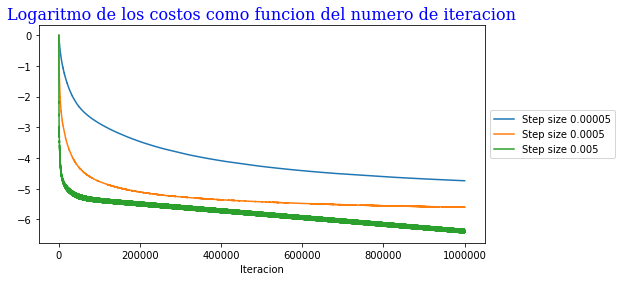

Train error normalizado SGD con steps size de 0.00005   =  0.00872947905079231
Train error normalizado SGD con steps size de 0.0005    =  0.0036855428226779826
Train error normalizado SGD con steps size de 0.005     =  0.0017292885710254843
Train error normalizado de la solucion exacta           =  1.650583287512628e-14


In [16]:
'''Ejercicio 2.c'''


train_n = 100
test_n = 1000
d = 100

X_train = np.random.normal(0,1, size=(train_n,d))                        # (100, 100)
a_true = np.random.normal(0,1, size=(d,1))                               # (100, 1)
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
X_test = np.random.normal(0,1, size=(test_n,d))                          # (1000, 100)
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

X_train_inv = LA.inv(X_train)  # (100, 100)
a_learned_exact = X_train_inv.dot(y_train)  # (100, 1)

# del ejercicio 1.c

def grad_stoch(b, x, y):  # b:(d,1), x:(d,1), y un numero
    return 2*((b.T).dot(x) - y)*x  # (d,1)

def st_gradient_descent(step, iter):
    b = np.zeros((d,1))
    costs_sgd = np.zeros(iter + 1)
    costs_sgd[0] = f_hat(X_train, b, y_train)
    for i in range(iter):  
        b = b - step * grad_stoch(b, X_train[i%train_n,:].reshape(d,1), y_train[i%train_n]) # i%n es el remanente de la division entera
        costs_sgd[i+1] = f_hat(X_train, b, y_train)
    return b, costs_sgd 

epoch = 10000    
iter = train_n*epoch  # en total 1.000.000 iteraciones
step_sizes_sgd = [0.00005, 0.0005, 0.005]
As_sgd = []
costs_sgd = []  # va a terminar siendo una lista de 3 elementos, donde cada elemento es un array
                # conteniendo las "iter" funcion objetivo de cada paso
for step in step_sizes_sgd:
    b, cost_sgd = st_gradient_descent(step, iter)
    As_sgd.append(b)
    costs_sgd.append(cost_sgd)

# figuras 
plt.figure(figsize=(8,4))
x_sgd = np.linspace(0, iter, iter + 1)

plt.plot(x_sgd, np.log(costs_sgd[0]), label = "Step size 0.00005")
plt.plot(x_sgd, np.log(costs_sgd[1]), label = "Step size 0.0005")
plt.plot(x_sgd, np.log(costs_sgd[2]), label = "Step size 0.005")

plt.xlabel("Iteracion")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Logaritmo de los costos como funcion del numero de iteracion", fontsize=16, fontname='serif', color="blue")
plt.show()

print("Train error normalizado SGD con steps size de 0.00005   = ", costs_sgd[0][iter])
print("Train error normalizado SGD con steps size de 0.0005    = ", costs_sgd[1][iter])
print("Train error normalizado SGD con steps size de 0.005     = ", costs_sgd[2][iter])
print("Train error normalizado de la solucion exacta           = ", f_hat(X_train, a_learned_exact, y_train))

In [17]:
# para comparar, vamos a generar la solucion regularizada para lambda = 0.5
lambd = 0.5

X = X_train # (100, 100)
XT = X.T    # (100, 100)
XTX = XT.dot(X)
XTXl = XTX + lambd*np.identity(d)  # (100, 100)
XTXl_inv = LA.inv(XTXl)               # (100, 100)
X_reg = (XTXl_inv).dot(XT)            # (100, 100)
a_learned_reg = (X_reg).dot(y_train)

In [19]:
trials = 1000
testerror_norm_sgd = np.zeros((len(step_sizes_sgd),trials))
testerror_norm_reg = np.zeros((1,trials))
testerror_norm_exact = np.zeros((1,trials))
testerror_norm_true = np.zeros((1,trials))

for i in range(trials):
    X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
    y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))
    testerror_norm_sgd[0,i] = f_hat(X_test, As_sgd[0], y_test)
    testerror_norm_sgd[1,i] = f_hat(X_test, As_sgd[1], y_test)
    testerror_norm_sgd[2,i] = f_hat(X_test, As_sgd[2], y_test)
    testerror_norm_reg[0,i] = f_hat(X_test, a_learned_reg, y_test)
    testerror_norm_exact[0,i] = f_hat(X_test, a_learned_exact, y_test)
    testerror_norm_true[0,i] = f_hat(X_test, a_true, y_test)

mean_testerror_norm_sgd = np.mean(testerror_norm_sgd, axis = 1)
mean_testerror_norm_reg = np.mean(testerror_norm_reg)
mean_testerror_norm_exact = np.mean(testerror_norm_exact)
mean_testerror_norm_true = np.mean(testerror_norm_true)


print("Train error normalizado SGD con steps size de 0.00005   = ", costs_sgd[0][iter])
print("Train error normalizado SGD con steps size de 0.0005    = ", costs_sgd[1][iter])
print("Train error normalizado SGD con steps size de 0.005     = ", costs_sgd[2][iter])
print("Train error normalizado regularizado lamda = 0.5        = ", f_hat(X_train, a_learned_reg, y_train))
print("Train error normalizado de la solucion exacta           = ", f_hat(X_train, a_learned_exact, y_train))
print("Train error normalizado del verdadero a_true            = ", f_hat(X_train, a_true, y_train))
print("Notar que el train error normalizado SGD es MENOR que el de a_true")
print("La intuicion diria que esta sobre fitteando el ruido, sin embargo")
print("logra un test error menor que la solucion exacta!:")

print("\n")

print("Test error normalizado SGD con steps size de 0.00005    = ", mean_testerror_norm_sgd[0])
print("Test error normalizado SGD con steps size de 0.0005     = ", mean_testerror_norm_sgd[1])
print("Test error normalizado SGD con steps size de 0.005      = ", mean_testerror_norm_sgd[2])
print("Train error normalizado regularizado lamda = 0.5        = ", mean_testerror_norm_reg)
print("Test error normalizado de la solucion exacta            = ", mean_testerror_norm_exact)
print("Test error normalizado del verdadero a_true             = ", mean_testerror_norm_true)
print("¿Como puede ser que, minimizando la MISMA funcion,")
print("SGD logra un test error menor que la solucion exacta??")
print("¿Como puede ser que SGD con pasos 0.00005 tiene un training error")
print("menor que con pasos 0.0005 o 0.005, y sus tests error se invierten??")

Train error normalizado SGD con steps size de 0.00005   =  0.00872947905079231
Train error normalizado SGD con steps size de 0.0005    =  0.0036855428226779826
Train error normalizado SGD con steps size de 0.005     =  0.0017292885710254843
Train error normalizado regularizado lamda = 0.5        =  0.012570855785642671
Train error normalizado de la solucion exacta           =  1.650583287512628e-14
Train error normalizado del verdadero a_true            =  0.05709279600981783
Notar que el train error normalizado SGD es MENOR que el de a_true
La intuicion diria que esta sobre fitteando el ruido, sin embargo
logra un test error menor que la solucion exacta!:


Test error normalizado SGD con steps size de 0.00005    =  0.3024794727741717
Test error normalizado SGD con steps size de 0.0005     =  0.2899437262108011
Test error normalizado SGD con steps size de 0.005      =  0.45671624418099177
Train error normalizado regularizado lamda = 0.5        =  0.295479508164621
Test error normalizad

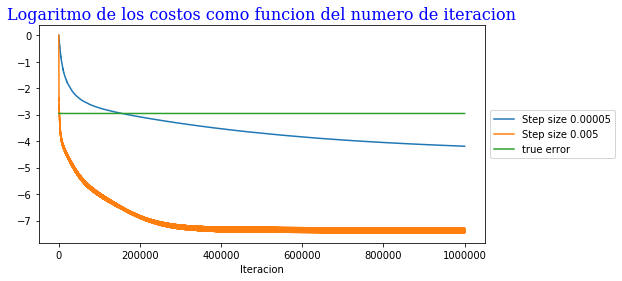

Train error normalizado SGD con steps size de 0.00005   =  0.015101164423973737
Train error normalizado SGD con steps size de 0.005     =  0.0006362637043182233
Train true error normalizado                            =  0.05202814464913334
Como ya habiamos visto, SGD logra menores train errors que el 'true' error
lo cual solo deberia ser posible si estuviera 'memorizando' ruido
Train error normalizado de la solucion exacta           =  7.268430384402369e-14


In [33]:
'''Ejercicio 2.d.i'''


train_n = 100
test_n = 1000
d = 100

X_train = np.random.normal(0,1, size=(train_n,d))   # (100, 100)
a_true = np.random.normal(0,1, size=(d,1))          # (100, 1)
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

X_train_inv = LA.inv(X_train)  # (100, 100)
a_learned_exact = X_train_inv.dot(y_train)  # (100, 1)

# del ejercicio 1.c

def grad_stoch(b, x, y):  # b:(d,1), x:(d,1), y un numero
    return 2*((b.T).dot(x) - y)*x.T  # (1,d) Notar que esto cambio de (d,1) a (1,d)!

def st_gradient_descent(step, iter):
#    b = np.zeros((d,1))
    b = np.zeros((iter + 1, d)) # ahora voy a guardar cada b
    costs_sgd = np.zeros(iter + 1)
    costs_sgd[0] = f_hat(X_train, b[0,:].reshape(d,1), y_train) 
    for i in range(iter): 
        b[i+1,:] = b[i,:] - step * grad_stoch(b[i,:].reshape(d,1), X_train[i%train_n,:].reshape(d,1), y_train[i%train_n])
#        b = b - step * grad_stoch(b, X_train[i%train_n,:].reshape(d,1), y_train[i%train_n]) # i%n es el remanente de la division entera
        costs_sgd[i+1] = f_hat(X_train, b[i+1,:].reshape(d,1), y_train)
    return b, costs_sgd # ahora la fila i-esima de b es el vector a correspondiente a la iteracion i-esima

epoch = 10000    
iter = train_n*epoch  # en total 1.000.000 iteraciones
step_sizes_sgd = [0.00005, 0.005]
As_sgd = []     # va a terminar siendo una lista de 2 elementos, donde cada elemento es un array
                # de shape (iter, d + 1) conteniendo los "iter" vectores a de cada paso
costs_sgd = []  # va a terminar siendo una lista de 2 elementos, donde cada elemento es un array
                # conteniendo las "iter" funcion objetivo de cada paso
for step in step_sizes_sgd:
    b, cost_sgd = st_gradient_descent(step, iter)
    As_sgd.append(b)
    costs_sgd.append(cost_sgd)

error_true  = f_hat(X_train, a_true, y_train)*np.ones(iter + 1)
# figuras 
plt.figure(figsize=(8,4))
x_sgd = np.linspace(0, iter, iter + 1)

plt.plot(x_sgd, np.log(costs_sgd[0]), label = "Step size 0.00005")
plt.plot(x_sgd, np.log(costs_sgd[1]), label = "Step size 0.005")
plt.plot(x_sgd, np.log(error_true), label  = "true error")

plt.xlabel("Iteracion")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Logaritmo de los costos como funcion del numero de iteracion", fontsize=16, fontname='serif', color="blue")
plt.show()

print("Train error normalizado SGD con steps size de 0.00005   = ", costs_sgd[0][iter])
print("Train error normalizado SGD con steps size de 0.005     = ", costs_sgd[1][iter])
print("Train true error normalizado                            = ", f_hat(X_train, a_true, y_train))
print("Como ya habiamos visto, SGD logra menores train errors que el 'true' error")
print("lo cual solo deberia ser posible si estuviera 'memorizando' ruido")
print("Train error normalizado de la solucion exacta           = ", f_hat(X_train, a_learned_exact, y_train))

In [56]:
'''Ejercicio 2.d.ii'''

'Ejercicio 2.d.ii'

In [34]:
every = 100
n_iter = As_sgd[0].shape[0]

"""As_sgd[0].shape = (1000001, 100), lo mismo que As_sgd[1].shape = (1000001, 100) 

abajo seleccionamos 1 de cada 100 filas, de modo de trabajar con matrices de shape (10001, 100)
de lo contrario se hace muy pesado. Entonces

As_sgd_00005 es la correspondiene matriz de shape (10001, 100) para step size 0.00005, y
As_sgd_005 es la correspondiene matriz de shape (10001, 100) para step size 0.005,"""


As_sgd_00005 = As_sgd[0][0:n_iter:every,:]  # seleccionamos uno de cada 100, sino la matriz es muy grande
As_sgd_005 = As_sgd[1][0:n_iter:every,:]
print("As_sgd_005.shape = ", As_sgd_005.shape)

As_sgd_005.shape =  (10001, 100)


In [35]:
"""Concentremonos en As_sgd_005 (el analisis del otro es identico)

Recordemos que SGD empieza con algun vector de coeficientes 'a' (lo empezamos con 'a' = 0)
la fila 'i' de As_sgd_005 corresponde al vector de coeficientes a del paso i*100-esimo.

X_test, de shape (1000, 100), representa 1000 muestras, cada una con sus 100 dimensiones. Entonces,

y_test_iter_pred_005 = As_sgd_005.dot(X_test.T)

de shape (10001, 1000), es una matriz cuya fila i-esima es la prediccion de y_test
para cada uno de los 1000 y_test hecho con el vector a generado en el paso i*100-esimo """


y_test_iter_pred_00005 = As_sgd_00005.dot(X_test.T)
y_test_iter_pred_005 = As_sgd_005.dot(X_test.T)
print("y_test_iter_pred_005.shape = ", y_test_iter_pred_005.shape)

y_test_iter_pred_005.shape =  (10001, 1000)


In [36]:
"""
Por lo tanto,

err_test_iter_005 = y_test_iter_pred_005 - y_test.T

es una matriz de shape (10001, 1000) cuya fila i-esima es el error en la prediccion de y_test
para cada uno de los 1000 tests. """

err_test_iter_00005 = y_test_iter_pred_00005 - y_test.T
err_test_iter_005 = y_test_iter_pred_005 - y_test.T

In [37]:
# vamos a calcular el error normalizado 
err_test_iter_00005_2 = err_test_iter_00005**2
err_test_iter_005_2   = err_test_iter_005**2

err_test_iter_00005_2_sum = np.sum(err_test_iter_00005_2, axis = 1)
err_test_iter_005_2_sum   = np.sum(err_test_iter_005_2, axis = 1)

print(err_test_iter_00005_2_sum.shape)

y_test_T_2 = (y_test.T)**2
y_test_T_2_sum = np.sum(y_test_T_2, axis = 1)

print(y_test_T_2_sum.shape)

(10001,)
(1,)


In [38]:
normerr_test_iter_00005 = np.sqrt(err_test_iter_00005_2_sum/y_test_T_2_sum)
normerr_test_iter_005   = np.sqrt(err_test_iter_005_2_sum/y_test_T_2_sum)
n_steps = normerr_test_iter_005.shape[0]
print(n_steps)

10001


Minimum test error SGD                       =  0.278437412711616
Test error normalizado de la solucion exacta =  0.4415033962842245


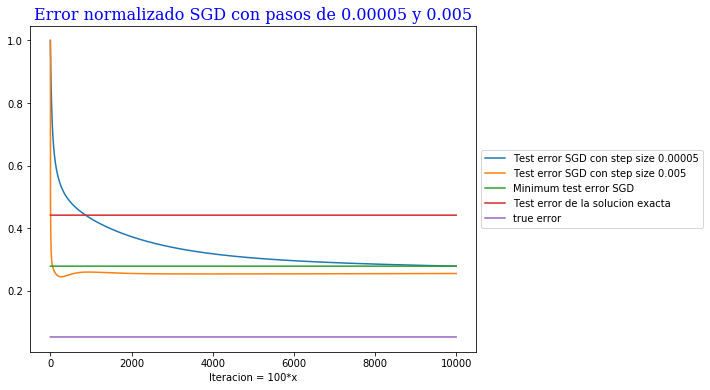

In [39]:
min_SGD_error = normerr_test_iter_00005[n_steps-1]
print("Minimum test error SGD                       = ", min_SGD_error)
error_sol_exacta = f_hat(X_test, a_learned_exact, y_test)
print("Test error normalizado de la solucion exacta = ", error_sol_exacta)
min_SGD_error = min_SGD_error*np.ones(n_steps)

error_true  = f_hat(X_train, a_true, y_train)*np.ones(n_steps)
error_sol_exacta = error_sol_exacta*np.ones(n_steps)

plt.figure(figsize=(8,6))
x = np.linspace(0, n_steps-1, n_steps)

plt.plot(x, normerr_test_iter_00005, label = "Test error SGD con step size 0.00005")
plt.plot(x, normerr_test_iter_005, label = "Test error SGD con step size 0.005")
plt.plot(x, min_SGD_error, label = "Minimum test error SGD")
plt.plot(x, error_sol_exacta, label = "Test error de la solucion exacta")
plt.plot(x, error_true, label  = "true error")

plt.xlabel("Iteracion = 100*x")
plt.title("Error normalizado SGD con pasos de 0.00005 y 0.005", fontsize=16, fontname='serif', color="blue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [125]:
'''Ejercicio 2.d.iii'''

'Ejercicio 2.d.iii'

In [40]:
As_sgd_00005_2 = As_sgd_00005**2
As_sgd_005_2 = As_sgd_005**2
print(As_sgd_005_2.shape)

norm_As_sgd_00005 = np.sqrt(np.sum(As_sgd_00005_2, axis = 1))
norm_As_sgd_005 = np.sqrt(np.sum(As_sgd_005_2, axis = 1))
print(norm_As_sgd_005.shape)

norm_a_true = LA.norm(a_true)
norm_a_true = norm_a_true*np.ones(n_steps)

(10001, 100)
(10001,)


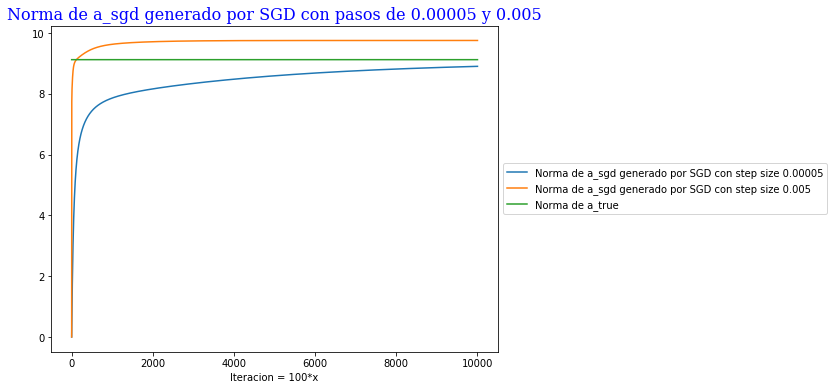

In [41]:
plt.figure(figsize=(8,6))
x = np.linspace(0, n_steps-1, n_steps)


plt.plot(x, norm_As_sgd_00005, label = "Norma de a_sgd generado por SGD con step size 0.00005")
plt.plot(x, norm_As_sgd_005, label = "Norma de a_sgd generado por SGD con step size 0.005")
plt.plot(x, norm_a_true, label = "Norma de a_true")
# plt.plot(x, error_sol_exacta, label = "Test error de la solucion exacta")
# plt.plot(x, error_true, label  = "true error")

plt.xlabel("Iteracion = 100*x")
plt.title("Norma de a_sgd generado por SGD con pasos de 0.00005 y 0.005", fontsize=16, fontname='serif', color="blue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
'''Ejercicio 2.e'''

'Ejercicio 2.e'

In [65]:
# generacion de los puntos iniciales al azar en la esfera
# d-dimensional con radio r = { 0, 0.1, 0.5, 1, 10, 20, 30}



radios = [0, 0.1, 0.5, 1, 10, 20, 30] # lista de los diferentes radios

r_array = np.array(radios).reshape(len(radios),1)


a0_crudo = np.random.normal(0,1, size=(len(radios),d))  # para cada valor de r generamos un vector d-dimensional
                                                        # a partir de una normal 0, 1. Es importante que sea generado
                                                        # con una normal para preservar simetria esferica.
a0_2 = a0_crudo**2
a0_norm = np.sqrt(np.sum(a0_2, axis = 1)).reshape(len(radios), 1) # cada uno de los 7 elementos de a0_norm
                                                                  # es la norma del vector d-dim 
a0_unit = a0_crudo/a0_norm   # python broadcastea correctamente las dimensiones
                       # a cada fila de a0 la divide por la norma del vector de esa fila. Testeamos:
print("norma al cuadrado de las filas de a0_unit = ", np.sum(a0_unit**2, axis = 1))

a0 = a0_unit*r_array
print("norma de las filas de a0 = ", np.sqrt(np.sum(a0**2, axis = 1)))
print("cada fila de a0 tiene la norma que queriamos")
print("a0.shape = ", a0.shape)

norma al cuadrado de las filas de a0_unit =  [1. 1. 1. 1. 1. 1. 1.]
norma de las filas de a0 =  [ 0.   0.1  0.5  1.  10.  20.  30. ]
cada fila de a0 tiene la norma que queriamos
a0.shape =  (7, 100)


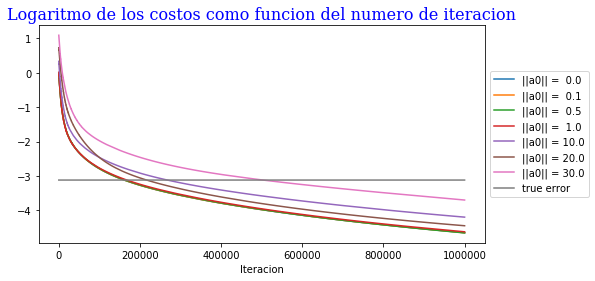

Train error normalizado SGD con ||a0|| =  0.0   =  0.009530017903658228
Train error normalizado SGD con ||a0|| =  0.1   =  0.009524978547348404
Train error normalizado SGD con ||a0|| =  0.5   =  0.009472674413331656
Train error normalizado SGD con ||a0|| =  1.0   =  0.009785701425952038
Train error normalizado SGD con ||a0|| = 10.0   =  0.01499223042436973
Train error normalizado SGD con ||a0|| = 20.0   =  0.01167083640084767
Train error normalizado SGD con ||a0|| = 30.0   =  0.024662641364585326
Train true error normalizado                    =  0.044110508916025144
Como ya habiamos visto, SGD logra menores train errors que el 'true' error
lo cual solo deberia ser posible si estuviera 'memorizando' ruido
Train error normalizado de la solucion exacta   =  1.4507177933880367e-14


In [66]:
train_n = 100
test_n = 1000
d = 100

X_train = np.random.normal(0,1, size=(train_n,d))   # (100, 100)
a_true = np.random.normal(0,1, size=(d,1))          # (100, 1)
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

X_train_inv = LA.inv(X_train)  # (100, 100)
a_learned_exact = X_train_inv.dot(y_train)  # (100, 1)

# del ejercicio 1.c

def grad_stoch(b, x, y):  # b:(d,1), x:(d,1), y un numero
    return 2*((b.T).dot(x) - y)*x.T  # (1,d) Notar que esto cambio de (d,1) a (1,d)!

def st_gradient_descent(step, iter, r):
#    b = np.zeros((d,1))
    b = np.zeros((iter + 1, d)) # ahora voy a guardar cada b
    costs_sgd = np.zeros(iter + 1)
    b[0,:] = a0[r,:]            # aca le doy el vector inicial
    costs_sgd[0] = f_hat(X_train, b[0,:].reshape(d,1), y_train) 
    for i in range(iter): 
        b[i+1,:] = b[i,:] - step * grad_stoch(b[i,:].reshape(d,1), X_train[i%train_n,:].reshape(d,1), y_train[i%train_n])
#        b = b - step * grad_stoch(b, X_train[i%train_n,:].reshape(d,1), y_train[i%train_n]) # i%n es el remanente de la division entera
        costs_sgd[i+1] = f_hat(X_train, b[i+1,:].reshape(d,1), y_train)
    return b, costs_sgd # ahora la fila i-esima de b es el vector a correspondiente a la iteracion i-esima

epoch = 10000    
iter = train_n*epoch  # en total 1.000.000 iteraciones

step = 0.00005


As_sgd = []     # va a terminar siendo una lista de 7 elementos, donde cada elemento es un array
                # de shape (iter, d + 1) conteniendo los "iter" vectores a de cada paso partiendo de cada a0[i,:]
costs_sgd = []  # va a terminar siendo una lista de 7 elementos, donde cada elemento es un array
                # conteniendo las "iter" funcion objetivo de cada paso partiendo de cada a0[i,:]
    
for i in range(len(radios)):
    b, cost_sgd = st_gradient_descent(step, iter, i)
    As_sgd.append(b)
    costs_sgd.append(cost_sgd)

error_true  = f_hat(X_train, a_true, y_train)*np.ones(iter + 1)
# figuras 
plt.figure(figsize=(8,4))
x_sgd = np.linspace(0, iter, iter + 1)

plt.plot(x_sgd, np.log(costs_sgd[0]), label = "||a0|| =  0.0")
plt.plot(x_sgd, np.log(costs_sgd[1]), label = "||a0|| =  0.1")  
plt.plot(x_sgd, np.log(costs_sgd[2]), label = "||a0|| =  0.5")
plt.plot(x_sgd, np.log(costs_sgd[3]), label = "||a0|| =  1.0")
plt.plot(x_sgd, np.log(costs_sgd[4]), label = "||a0|| = 10.0")
plt.plot(x_sgd, np.log(costs_sgd[5]), label = "||a0|| = 20.0")
plt.plot(x_sgd, np.log(costs_sgd[6]), label = "||a0|| = 30.0")
plt.plot(x_sgd, np.log(error_true), label  = "true error")

plt.xlabel("Iteracion")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Logaritmo de los costos como funcion del numero de iteracion", fontsize=16, fontname='serif', color="blue")
plt.show()

print("Train error normalizado SGD con ||a0|| =  0.0   = ", costs_sgd[0][iter])
print("Train error normalizado SGD con ||a0|| =  0.1   = ", costs_sgd[1][iter])
print("Train error normalizado SGD con ||a0|| =  0.5   = ", costs_sgd[2][iter])
print("Train error normalizado SGD con ||a0|| =  1.0   = ", costs_sgd[3][iter])
print("Train error normalizado SGD con ||a0|| = 10.0   = ", costs_sgd[4][iter])
print("Train error normalizado SGD con ||a0|| = 20.0   = ", costs_sgd[5][iter])
print("Train error normalizado SGD con ||a0|| = 30.0   = ", costs_sgd[6][iter])
print("Train true error normalizado                    = ", f_hat(X_train, a_true, y_train))
print("Como ya habiamos visto, SGD logra menores train errors que el 'true' error")
print("lo cual solo deberia ser posible si estuviera 'memorizando' ruido")
print("Train error normalizado de la solucion exacta   = ", f_hat(X_train, a_learned_exact, y_train))

In [80]:
def grad_stoch(b, x, y):  # b:(d,1), x:(d,1), y un numero
    return 2*((b.T).dot(x) - y)*x  # (d,1)

def st_gradient_descent(step, iter, r):
    b = a0[r,:].reshape(d,1)   # condicion inicial a0 de radio radios[r]
    for i in range(iter):  
        b = b - step * grad_stoch(b, X_train[i%train_n,:].reshape(d,1), y_train[i%train_n]) # i%n es el remanente de la division entera
    b_learned = b.reshape(d)
    return b_learned     # retorna el vector aprendido

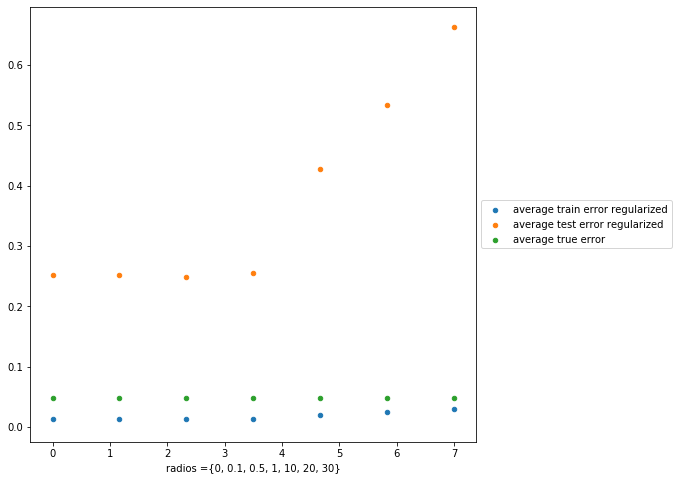

modulo de los diferentes vectores iniciales =  [0, 0.1, 0.5, 1, 10, 20, 30]
mean train error =  [0.01348117 0.0134918  0.01352433 0.01389019 0.02019448 0.02472918
 0.03065185]
mean test error  =  [0.25240969 0.25270166 0.2492361  0.25580132 0.42688996 0.53369885
 0.66322856]
mean true error  =  [0.04786496 0.04786496 0.04786496 0.04786496 0.04786496 0.04786496
 0.04786496]


In [82]:
trials = 1

train_n = 100
test_n = 1000
d = 100

epoch = 10000    
iter = train_n*epoch  # en total 1.000.000 iteraciones

step = 0.00005


radios = [0, 0.1, 0.5, 1, 10, 20, 30]
r_n = len(radios)

a_true_array = np.zeros((trials, d))          # este es el a_true para cada trial
a_learned_array = np.zeros((trials, r_n, d))  # este es el a_learned, para cada trial, y para cada punto de partida

error_train = np.zeros((r_n, trials))  # la fila i-esima va a tener los 'trial' training costs asociados a a0[i,:]
error_test  = np.zeros((r_n, trials))  # la fila i-esima va a tener los 'trial' tests costs asociados a a0[i,:]
error_true  = np.zeros((r_n, trials))

for i in range(trials):             # quiero que cada trial tenga los mismo datos para distintos lambda
    X_train = np.random.normal(0,1, size=(train_n,d))   # (100, 100)
    a_true_array[i,:] = np.random.normal(0,1, size=(d))          # (100, 1)
    a_true = (a_true_array[i,:]).reshape(d,1)
    y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1)) # (100, 1)
    X_test = np.random.normal(0,1, size=(test_n,d))     # (1000, 100)
    y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))    # (1000, 1)

    
    for j in range(r_n):
        a_learned_array[i,j,:] = st_gradient_descent(step, iter, j)
        error_train[j, i] = f_hat(X_train, a_learned_array[i,j,:].reshape(d,1), y_train)
        error_test[j, i]  = f_hat(X_test, a_learned_array[i,j,:].reshape(d,1), y_test)
        error_true[j, i]  = f_hat(X_test, a_true, y_test)
        

mean_error_train = np.mean(error_train, axis = 1)
mean_error_test  = np.mean(error_test, axis = 1)
mean_error_true  = np.mean(error_true, axis = 1)



fig, ax = plt.subplots(figsize=(8,8))


# x = np.log10(np.array(lambd)/5)
x = np.linspace(0, r_n, r_n)

ax.scatter(x, mean_error_train, label = "average train error regularized", s = 20)
ax.scatter(x, mean_error_test, label  = "average test error regularized",  s = 20)
ax.scatter(x, mean_error_true, label  = "average true error",  s = 20)

# plt.plot(x, error_true_reg_lambda, label  = "average true error regularized")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("radios ={0, 0.1, 0.5, 1, 10, 20, 30}")

plt.show()

print("modulo de los diferentes vectores iniciales = ", radios)
print("mean train error = ", mean_error_train)
print("mean test error  = ", mean_error_test)
print("mean true error  = ", mean_error_true)

In [83]:
print(a_true_array.shape)
print(a_learned_array.shape)

(1, 100)
(1, 7, 100)


In [91]:
error = np.zeros(7)
a_t = a_true_array[0,:]
e = a_true_array[0,:] - a_learned_array[0,0,:]
error[0] = np.sqrt(np.dot(e,e)/np.dot(a_t,a_t))

In [93]:
a_l = a_learned_array[0,0,:]
print(np.dot(a_t, a_l)/(LA.norm(a_t)*LA.norm(a_l)))

0.9678678612098497


In [92]:
error[0]

0.2514642817523218